# Preparing data for merging

In [1]:
import pandas as pd

In [2]:
df_actions = pd.read_csv("/Users/a.arkhipova/Downloads/Term project/Database with Actions.csv")
df_int = pd.read_excel("/Users/a.arkhipova/Downloads/Term project/Database with INT.xlsx")
df_spark = pd.read_excel("/Users/a.arkhipova/Downloads/Term project/spark_database.xlsx")

First dataset:

In [3]:
df_actions.head()

,Unnamed: 0,Company,Action,Industry,Country,tone
0,0,Cheil Worldwide,"['ban', 'on', 'all', 'russian', 'competition']",NGO,United Kingdom,0
1,1,CitiGroup,"['ban', 'on', 'all', 'russian', 'competition']",NGO,France,0
2,2,Citrix,"['ban', 'on', 'all', 'russian', 'competition']",NGO,United States,0
3,3,CJ CheilJedang,"['ban', 'on', 'all', 'russian', 'competition']",NGO,Switzerland,0
4,4,Claas Group,"['ban', 'on', 'all', 'russian', 'competition']",NGO,Switzerland,0


In [4]:
df_actions = df_actions.drop("Unnamed: 0", axis= 1)
df_actions = df_actions.rename(columns = {'tone': 'Tone'})
df_actions = df_actions.sort_values(by='Company')
df_actions = df_actions.reset_index(drop=True)
df_actions.head()

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,2
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,0
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1


Second dataset:

In [5]:
df_int.head()

,i,Action,Industry,Country,ИНН
0,«Волга-Днепр»,"continue operations on an unspecified ""lower"" ...",Industrials,Netherlands,NaN
1,«Иль де Ботэ»,suspend non-essential business activity,Health Care,United States,7725594604
2,1840 & Company,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873
3,1Password,suspend new investments/development,Consumer Discretionary,France,7704662187
4,1xBet,ending new investments where has control over ...,Financials,Netherlands,NaN


In [6]:
df_int = df_int.rename(columns={'i': 'Company'})
df_int = df_int.rename(columns={'ИНН': 'INT'})
df_int = df_int.sort_values(by='Company')
df_int = df_int.reset_index(drop=True)
df_int.head()

,Company,Action,Industry,Country,INT
0,1840 & Company,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873
1,1Password,suspend new investments/development,Consumer Discretionary,France,7704662187
2,1xBet,ending new investments where has control over ...,Financials,Netherlands,NaN
3,3HC Semiconductors,"Some clients no longer supplied, others scaled...",Materials,France,3528103017
4,3M,suspend supply of parts and deliveries/servici...,Industrials,Netherlands,9704116463


In [7]:
df_spark = df_spark.drop(['№', 'Наименование', 'Регистрационный номер', 'Краткое наименование', 'Дата регистрации', 'Мои списки'], axis= 1)
df_spark.columns = ['Company', 
                    'Age of the company',
                    'INT', 
                    'Industry', 
                    'Legal form', 
                    'Type of ownership', 
                    'Company size', 
                    '2017, Average number of employees', 
                    '2018, Average number of employees', 
                    '2019, Average number of employees', 
                    '2020, Average number of employees', 
                    '2021, Average number of employees', 
                    '2017, Profit, RUB', 
                    '2018, Profit, RUB', 
                    '2019, Profit, RUB', 
                    '2020, Profit, RUB', 
                    '2021, Profit, RUB', 
                    '2017, Profit (loss) before tax, RUB', 
                    '2018, Profit (loss) before tax, RUB', 
                    '2019, Profit (loss) before tax, RUB', 
                    '2020, Profit (loss) before tax, RUB', 
                    '2021, Profit (loss) before tax, RUB']
df_spark.head()

,Company,Age of the company,INT,Industry,Legal form,Type of ownership,Company size,"2017, Average number of employees","2018, Average number of employees","2019, Average number of employees",...,"2017, Profit, RUB","2018, Profit, RUB","2019, Profit, RUB","2020, Profit, RUB","2021, Profit, RUB","2017, Profit (loss) before tax, RUB","2018, Profit (loss) before tax, RUB","2019, Profit (loss) before tax, RUB","2020, Profit (loss) before tax, RUB","2021, Profit (loss) before tax, RUB"
0,"3M VOLGA, OOO",10.5,1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,1.330000e+07,1.047220e+08,2.189160e+08,1.948400e+07,1.534580e+08,-1.544490e+08,-1.473710e+08,-1.355290e+08,-196685000.0,-1.728320e+08
1,"OOO C, CJSC",3.5,8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,NaN,NaN,4,...,NaN,NaN,NaN,6.512600e+07,4.702200e+07,NaN,NaN,-3.810000e+05,8130000.0,2.130000e+05
2,"WIX-SZ, OOO",10.0,3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,2,2,1,...,1.804900e+07,1.159200e+07,5.157000e+06,1.139900e+07,1.548100e+07,5.580000e+05,5.480000e+05,2.790000e+05,422000.0,5.430000e+05
3,"A.S. GROUP, LLC",4.0,2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,Собственность иностранных граждан и лиц без гр...,Микропредприятия,NaN,NaN,1,...,NaN,NaN,1.586000e+06,5.833000e+06,NaN,NaN,NaN,-2.667000e+06,-914000.0,NaN
4,"ABB, OOO",22.0,7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,501 - 1 000,501 - 1 000,NaN,...,2.101227e+10,2.314304e+10,2.236231e+10,2.354496e+10,2.333974e+10,1.908551e+09,1.011902e+09,1.142817e+09,-33797000.0,1.555765e+09


Third dataset:

In [8]:
df_spark.head()

,Company,Age of the company,INT,Industry,Legal form,Type of ownership,Company size,"2017, Average number of employees","2018, Average number of employees","2019, Average number of employees",...,"2017, Profit, RUB","2018, Profit, RUB","2019, Profit, RUB","2020, Profit, RUB","2021, Profit, RUB","2017, Profit (loss) before tax, RUB","2018, Profit (loss) before tax, RUB","2019, Profit (loss) before tax, RUB","2020, Profit (loss) before tax, RUB","2021, Profit (loss) before tax, RUB"
0,"3M VOLGA, OOO",10.5,1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,1.330000e+07,1.047220e+08,2.189160e+08,1.948400e+07,1.534580e+08,-1.544490e+08,-1.473710e+08,-1.355290e+08,-196685000.0,-1.728320e+08
1,"OOO C, CJSC",3.5,8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,NaN,NaN,4,...,NaN,NaN,NaN,6.512600e+07,4.702200e+07,NaN,NaN,-3.810000e+05,8130000.0,2.130000e+05
2,"WIX-SZ, OOO",10.0,3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,2,2,1,...,1.804900e+07,1.159200e+07,5.157000e+06,1.139900e+07,1.548100e+07,5.580000e+05,5.480000e+05,2.790000e+05,422000.0,5.430000e+05
3,"A.S. GROUP, LLC",4.0,2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,Собственность иностранных граждан и лиц без гр...,Микропредприятия,NaN,NaN,1,...,NaN,NaN,1.586000e+06,5.833000e+06,NaN,NaN,NaN,-2.667000e+06,-914000.0,NaN
4,"ABB, OOO",22.0,7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,501 - 1 000,501 - 1 000,NaN,...,2.101227e+10,2.314304e+10,2.236231e+10,2.354496e+10,2.333974e+10,1.908551e+09,1.011902e+09,1.142817e+09,-33797000.0,1.555765e+09


# Merging three databases

In [9]:
df1 = df_actions.copy()
df2 = df_int.copy()

df_merged = pd.merge(df1, df2, on='Company')
df_merged.head()

,Company,Action_x,Industry_x,Country_x,Tone,Action_y,Industry_y,Country_y,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,2,suspend new investments/development,Consumer Discretionary,France,7704662187
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,0,ending new investments where has control over ...,Financials,Netherlands,NaN
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,"Some clients no longer supplied, others scaled...",Materials,France,3528103017
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,suspend supply of parts and deliveries/servici...,Industrials,Netherlands,9704116463


In [10]:
df_merged = df_merged.drop(['Action_y', 'Industry_y', 'Country_y'], axis= 1)
df_merged = df_merged.rename(columns={'Action_x': 'Action', 'Industry_x': 'Industry', 'Country_x': 'Country'})

In [11]:
df_merged

,Company,Action,Industry,Country,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,7743855873
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,2,7704662187
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,0,NaN
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,3528103017
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,9704116463
...,...,...,...,...,...,...
3339,"Французский автомобильный концерн Re...""","['no', 'new', 'investments']",Utilities,France,0,5003026630
3340,Хостинг Ukraine,"['ban', 'people', 'with', 'ties', 'to', 'russi...",NGO,Germany,0,7453231464
3341,Шальке,"['no', 'new', 'business']",Industrials,Denmark,0,NaN
3342,Эвертон,"['stopped', 'renewing', 'and', 'underwriting',...",Financials,United States,0,6829067343


In [12]:
data = pd.merge(df_merged, df_spark, on='INT')

In [13]:
data.head(30)

,Company_x,Action,Industry_x,Country,Tone,INT,Company_y,Age of the company,Industry_y,Legal form,...,"2017, Profit, RUB","2018, Profit, RUB","2019, Profit, RUB","2020, Profit, RUB","2021, Profit, RUB","2017, Profit (loss) before tax, RUB","2018, Profit (loss) before tax, RUB","2019, Profit (loss) before tax, RUB","2020, Profit (loss) before tax, RUB","2021, Profit (loss) before tax, RUB"
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,7743855873,"EBBVI, OOO",10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,3528103017,"ALS, AO",17.5,Производство промышленных газов,Непубличные акционерные общества,...,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,9704116463,"AIRBUS, LLC",1.0,Деятельность туристических агентств,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,0,7714391842,"FUDZHIFILM RUS, OOO",29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,...,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,ABC,"['no', 'new', 'business', 'in', 'russia']",Consumer Discretionary,Austria,0,9715417769,"HERZ GROUP RUS, LLC",0.5,Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABC News,"['suspend', 'new', 'investments', 'in', 'russia']",Industrials,United States,2,7728053385,"UPDK-KHAINS, OOO",31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,-2.700000e+04,-6.570000e+05,-4.730000e+05,-1.150000e+05,-8.300000e+04
6,ACCA,"['suspend', 'new', 'investment', 'in', 'russia']",Industrials,France,2,7725704127,"ID LOGISTIKS RUS, OOO",12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,...,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08
7,ADAMA,"['no', 'further', 'investments/clinical', 'tri...",Health Care,United States,0,7701620453,"MERCK LIFE SCIENCE, LLC",17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,...,5.021710e+08,7.805270e+08,8.318420e+08,1.349847e+09,1.831439e+09,1.023740e+08,9.124000e+07,5.450100e+07,3.063090e+08,3.462030e+08
8,ADM,"['pause', 'all', 'new', 'capital', 'investment...",Health Care,Switzerland,0,7705772224,"NOVARTIS FARMA, OOO",16.0,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,1.818445e+10,2.189451e+10,2.813808e+10,3.185499e+10,3.972223e+10,-4.636200e+07,9.910820e+08,1.615200e+08,8.897000e+07,5.594630e+08
9,ADP,"['no', 'new', 'russian', 'investments', ';', '...",Energy,Austria,0,7728139307,"OMV, OOO",26.5,Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,...,4.295000e+06,3.292000e+06,5.660000e+06,7.350000e+06,7.103000e+06,-5.800000e+04,-3.088000e+06,8.450000e+05,2.063000e+06,1.690000e+06


In [14]:
data = data.rename(columns={"Company_y": "Company", "Industry_x": "Industry"})

data = data.drop({'Company_x', 'INT', 'Industry_y',
                          '2017, Average number of employees', 
                          '2018, Average number of employees',
                          '2019, Average number of employees', 
                          '2020, Average number of employees', 
                          '2021, Average number of employees'}, axis=1)

In [15]:
data.head()

,Action,Industry,Country,Tone,Company,Age of the company,Legal form,Type of ownership,Company size,"2017, Profit, RUB","2018, Profit, RUB","2019, Profit, RUB","2020, Profit, RUB","2021, Profit, RUB","2017, Profit (loss) before tax, RUB","2018, Profit (loss) before tax, RUB","2019, Profit (loss) before tax, RUB","2020, Profit (loss) before tax, RUB","2021, Profit (loss) before tax, RUB"
0,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,"EBBVI, OOO",10.5,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,"ALS, AO",17.5,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,"AIRBUS, LLC",1.0,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['suspended', 'some', 'shipments']",Information Technology,Japan,0,"FUDZHIFILM RUS, OOO",29.0,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,"['no', 'new', 'business', 'in', 'russia']",Consumer Discretionary,Austria,0,"HERZ GROUP RUS, LLC",0.5,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data = data[['Company', 'Industry', 'Country', 'Action', 'Tone', 'Age of the company','Legal form', 'Type of ownership', 'Company size', '2017, Profit, RUB',
       '2018, Profit, RUB', '2019, Profit, RUB', '2020, Profit, RUB',
       '2021, Profit, RUB', '2017, Profit (loss) before tax, RUB',
       '2018, Profit (loss) before tax, RUB',
       '2019, Profit (loss) before tax, RUB',
       '2020, Profit (loss) before tax, RUB',
       '2021, Profit (loss) before tax, RUB']]

In [17]:
data.head()

,Company,Industry,Country,Action,Tone,Age of the company,Legal form,Type of ownership,Company size,"2017, Profit, RUB","2018, Profit, RUB","2019, Profit, RUB","2020, Profit, RUB","2021, Profit, RUB","2017, Profit (loss) before tax, RUB","2018, Profit (loss) before tax, RUB","2019, Profit (loss) before tax, RUB","2020, Profit (loss) before tax, RUB","2021, Profit (loss) before tax, RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",1,1.0,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",0,29.0,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",0,0.5,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
database = data.copy()

# Handling missing values

Count total NaN at each column in a database

In [19]:
print("\nCount total NaN at each column in a DataFrame: \n") 
database.isnull().sum()


Count total NaN at each column in a DataFrame: 



Company                                  0
Industry                                 0
Country                                  0
Action                                   0
Tone                                     0
Age of the company                       0
Legal form                               0
Type of ownership                        0
Company size                            77
2017, Profit, RUB                      123
2018, Profit, RUB                      111
2019, Profit, RUB                      104
2020, Profit, RUB                      100
2021, Profit, RUB                      106
2017, Profit (loss) before tax, RUB    110
2018, Profit (loss) before tax, RUB    103
2019, Profit (loss) before tax, RUB     89
2020, Profit (loss) before tax, RUB     86
2021, Profit (loss) before tax, RUB     92
dtype: int64

Visualize missing values in dataset

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Visualize the number of missing values as a bar chart

<AxesSubplot:>

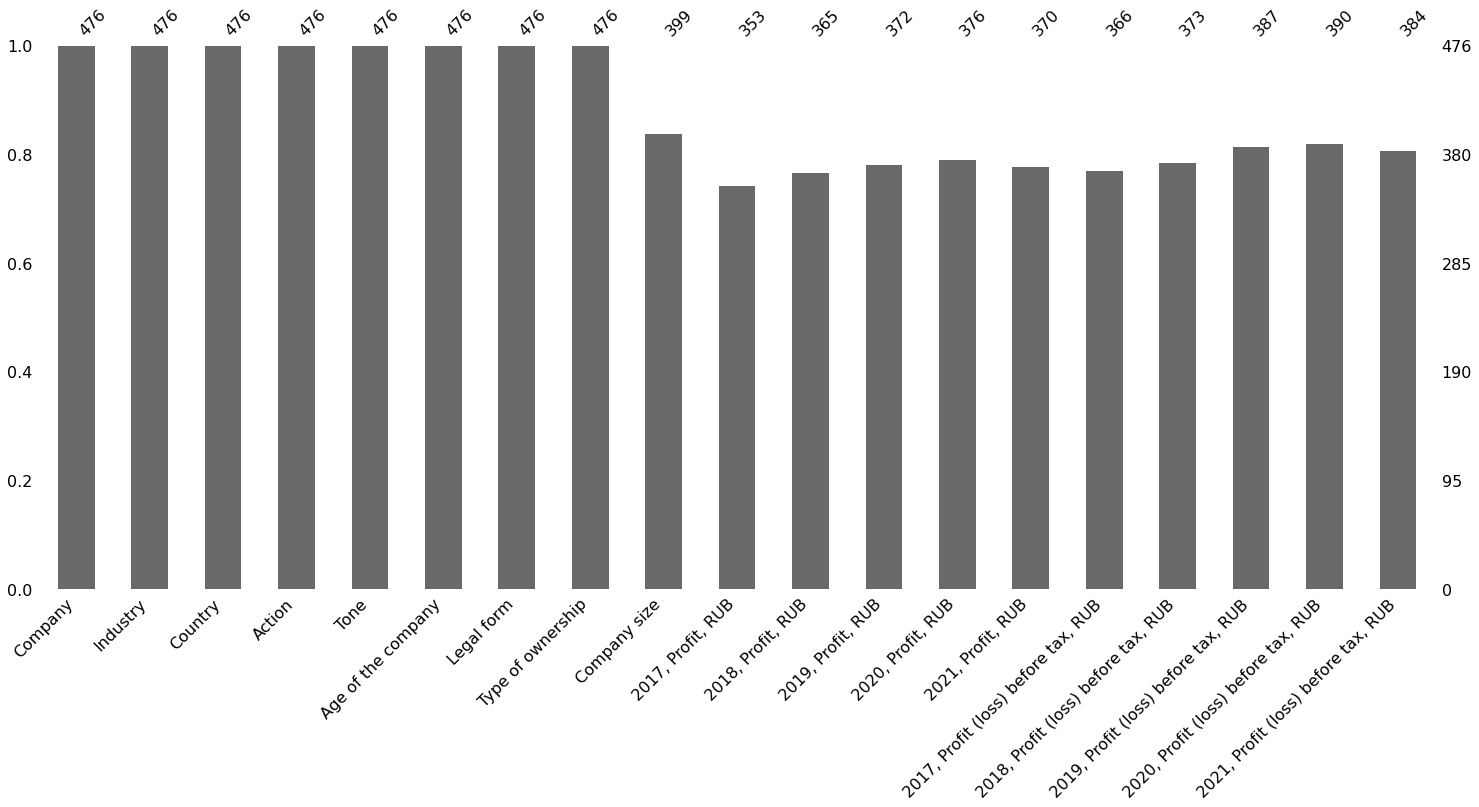

In [21]:
import missingno as msno
msno.bar(database)

Visualize the number of missing values as a matrix plot

<AxesSubplot:>

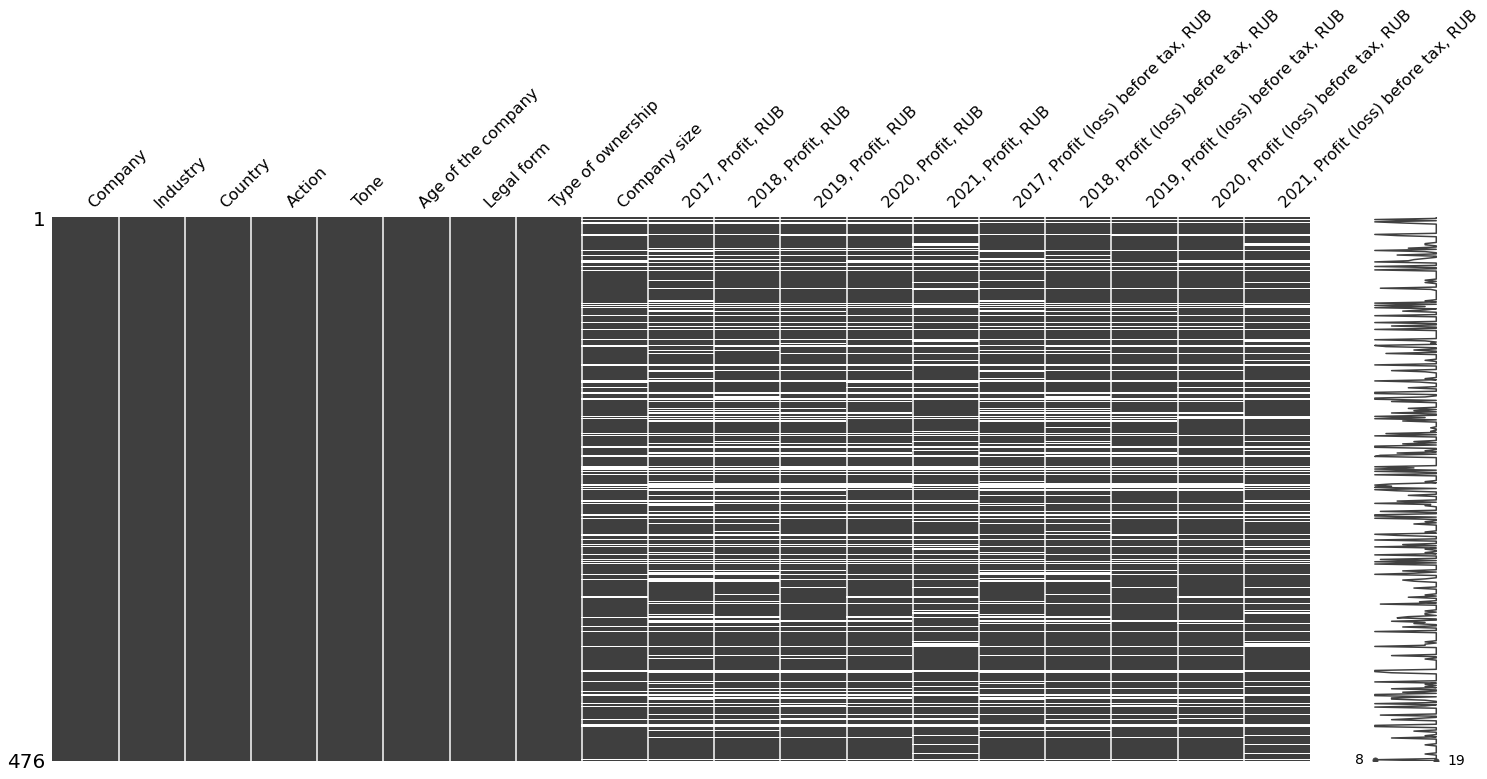

In [22]:
msno.matrix(database)

Visualize the correlation between the number of missing values in different columns as a heatmap

<AxesSubplot:>

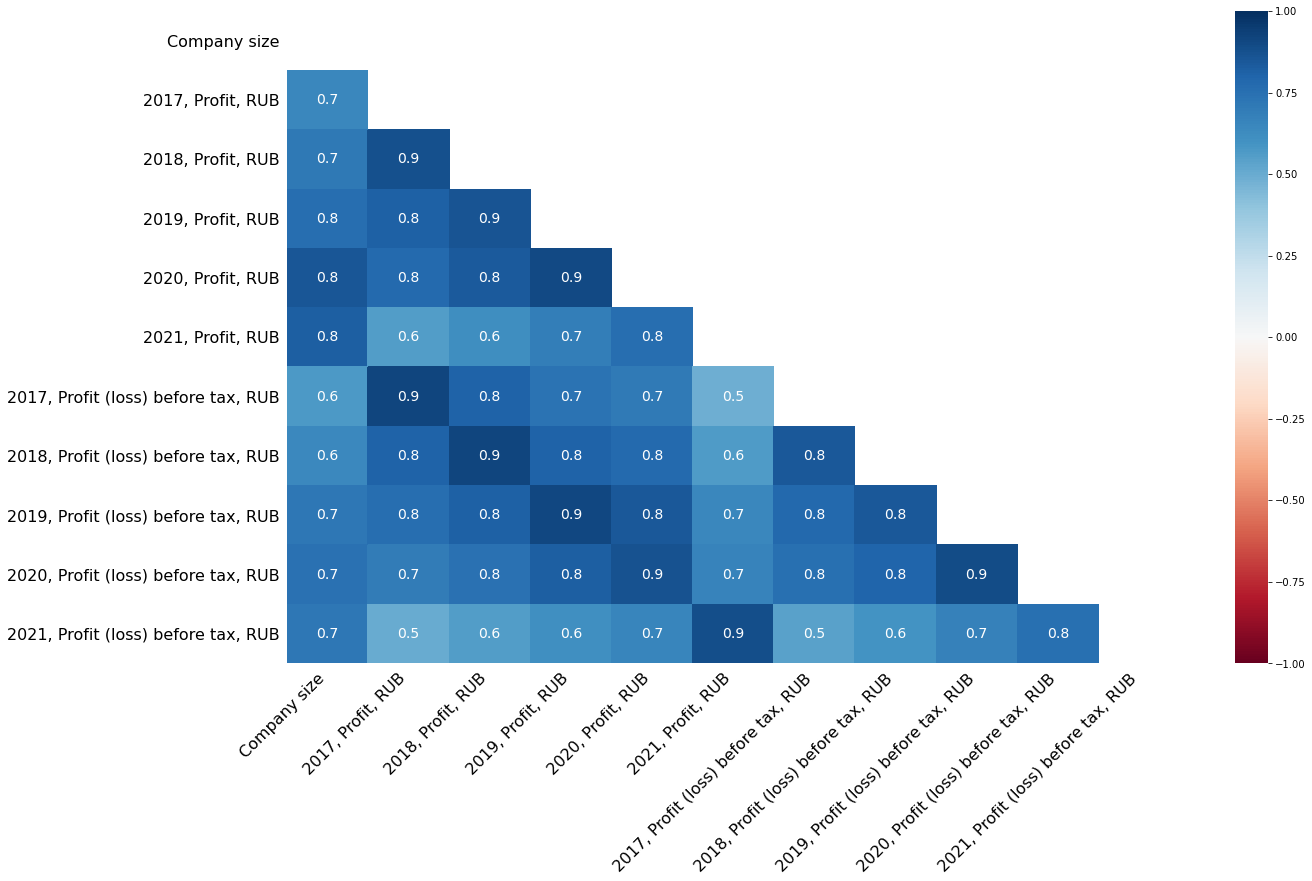

In [23]:
msno.heatmap(database)

As we see below, there is a diagonal with values 0.9, which means that profit and insome highly correlates in terms of null values (if profit value is present, then income value is likely to be present too)

Delete all rows where more than 6 NaN values exist

In [24]:
database.dropna(thresh=database.shape[1] - 6, inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n") 
database.isnull().sum()

 
Count total NaN at each column in a DataFrame : 



Company                                 0
Industry                                0
Country                                 0
Action                                  0
Tone                                    0
Age of the company                      0
Legal form                              0
Type of ownership                       0
Company size                           10
2017, Profit, RUB                      38
2018, Profit, RUB                      26
2019, Profit, RUB                      18
2020, Profit, RUB                      14
2021, Profit, RUB                      34
2017, Profit (loss) before tax, RUB    30
2018, Profit (loss) before tax, RUB    20
2019, Profit (loss) before tax, RUB     5
2020, Profit (loss) before tax, RUB     6
2021, Profit (loss) before tax, RUB    25
dtype: int64

In [25]:
database.shape

(389, 19)

Delete all rows where Nan values exist

In [26]:
columns=['2017, Profit, RUB', '2018, Profit, RUB', '2019, Profit, RUB', '2020, Profit, RUB', '2021, Profit, RUB']
dfs = [database.dropna(subset=[col]) for col in columns]

# Drop rows with NaN values for each profit column separately
intersection_indices = set(dfs[0].index).intersection(*[df.index for df in dfs[1:]])

# Select rows with indices present in the intersection
df_filtered = database.loc[intersection_indices]
df_filtered.reset_index(drop=True, inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n")
df_filtered.isnull().sum()

 
Count total NaN at each column in a DataFrame : 



Company                                0
Industry                               0
Country                                0
Action                                 0
Tone                                   0
Age of the company                     0
Legal form                             0
Type of ownership                      0
Company size                           0
2017, Profit, RUB                      0
2018, Profit, RUB                      0
2019, Profit, RUB                      0
2020, Profit, RUB                      0
2021, Profit, RUB                      0
2017, Profit (loss) before tax, RUB    1
2018, Profit (loss) before tax, RUB    2
2019, Profit (loss) before tax, RUB    0
2020, Profit (loss) before tax, RUB    2
2021, Profit (loss) before tax, RUB    2
dtype: int64

In [27]:
#New dataset without NaN values in columns:
#Age of the company                               
#Kind of activity                            
#Legal form                       
#Type of ownership                                 
#Company size                                    
#2017, Profit, RUB                                  
#2018, Profit, RUB                                  
#2019, Profit, RUB                                 
#2020, Profit, RUB                                  
#2021, Profit, RUB

df_filtered.shape

(318, 19)

# Clusterisation (Hierarchical)

Delete columns that has NaN and unnecessary values

In [28]:
database2 = df_filtered.drop({'2017, Profit (loss) before tax, RUB', 
                           '2018, Profit (loss) before tax, RUB',
                           '2019, Profit (loss) before tax, RUB',   
                           '2020, Profit (loss) before tax, RUB',   
                           '2021, Profit (loss) before tax, RUB',
                           'Action',
                           '2017, Profit, RUB',
                           '2018, Profit, RUB',
                           '2019, Profit, RUB',
                           '2020, Profit, RUB',
                           '2021, Profit, RUB', 'Company'}, axis= 1)
database2 = database2.replace(['Крупные предприятия'],'3')
database2 = database2.replace(['Средние предприятия'],'2')
database2 = database2.replace(['Малые предприятия'],'1')
database2 = database2.replace(['Микропредприятия'],'0')

In [29]:
database2.head(30)

,Industry,Country,Tone,Age of the company,Legal form,Type of ownership,Company size
0,Health Care,United States,2,10.5,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,3
1,Materials,France,0,17.5,Непубличные акционерные общества,Совместная частная и иностранная собственность,3
2,Information Technology,Japan,0,29.0,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,3
3,Industrials,France,2,12.5,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,3
4,Health Care,United States,0,17.5,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
5,Health Care,Switzerland,0,16.0,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,3
6,Energy,Austria,0,26.5,Общества с ограниченной ответственностью,Частная собственность,0
7,Industrials,Germany,0,11.5,Общества с ограниченной ответственностью,Иная смешанная российская собственность,2
8,Health Care,France,1,28.0,Непубличные акционерные общества,Собственность иностранных юридических лиц,3
9,Industrials,Belgium,0,14.0,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1


In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
matplotlib.style.use('ggplot')
%matplotlib inline

# Clusterizarion of dataset by industries

In [31]:
dataset1 = database2.drop({"Country", 'Legal form', 'Type of ownership'}, axis=1)

In [32]:
dataset1.set_index("Industry")

,Tone,Age of the company,Company size
Industry,,,
Health Care,2,10.5,3
Materials,0,17.5,3
Information Technology,0,29.0,3
Industrials,2,12.5,3
Health Care,0,17.5,2
...,...,...,...
Consumer Staples,1,25.0,3
Consumer Staples,0,15.5,2
Health Care,2,24.5,3


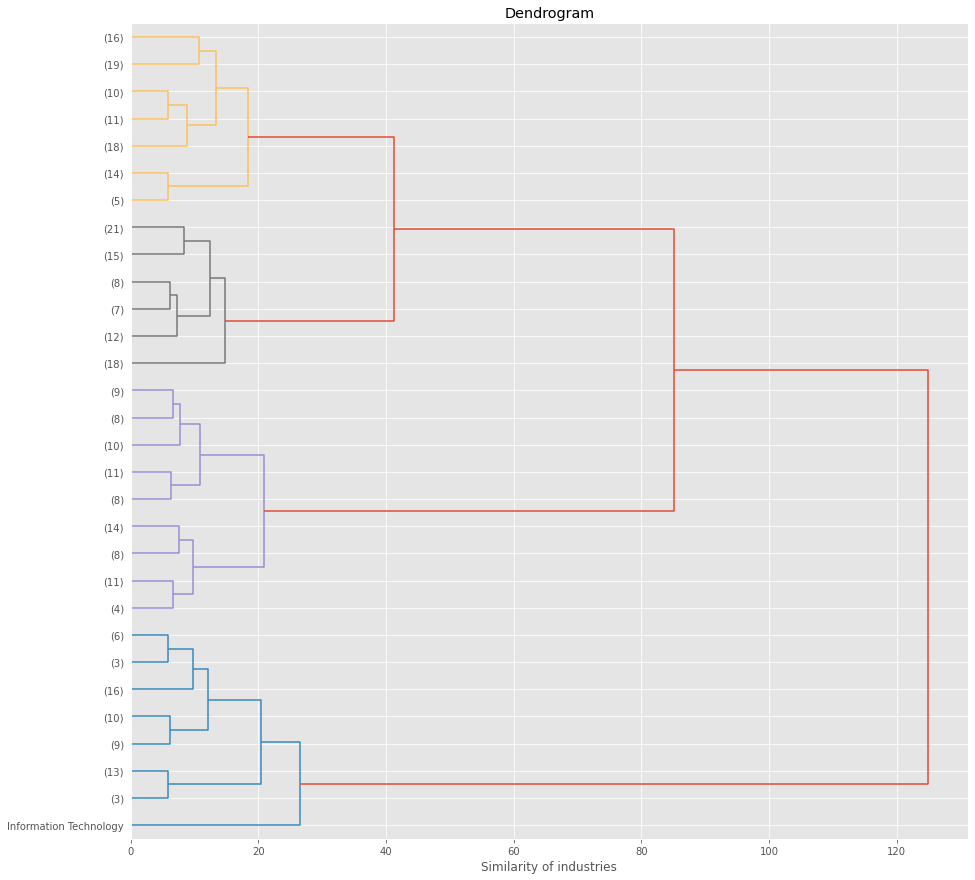

In [33]:
# Исключаем информацию об индустриях, сохраняем для дальнейшего использования
varieties = list(dataset1.pop('Industry'))

# Извлекаем измерения как массив NumPy
samples = dataset1.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = sch.linkage(samples, 'ward', 'euclidean')

fig = plt.figure(figsize=(15, 15))
                         
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Similarity of industries')

ax1.set_title('Dendrogram')


# Строим дендрограмму, указав параметры удобные для отображения
dn = sch.dendrogram(mergings, labels=varieties,
           color_threshold = 40,
           leaf_rotation=0,
           leaf_font_size=10,
           truncate_mode='lastp',
           orientation = "right",
           )

plt.show()

In [34]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 16
dataset1['Cluster'] = sch.fcluster(mergings, 40, criterion='distance')


# Останавливаем объединение, когда останется 4 кластера
#database3['cluster'] = fcluster(mergings, 4, criterion='maxclust')

dataset1.head(10)

,Tone,Age of the company,Company size,Cluster
0,2,10.5,3,2
1,0,17.5,3,4
2,0,29.0,3,1
3,2,12.5,3,2
4,0,17.5,2,4
5,0,16.0,3,3
6,0,26.5,0,1
7,0,11.5,2,2
8,1,28.0,3,1
9,0,14.0,1,3


Добавим к таблице данных database3 столбец cluster, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды fcluster.
Первый аргумент команды это объект link, содержащий результаты кластеризации.
Третий аргумент criterion указывает, как разбивать на кластеры (distance, если остановка объединений по расстоянию между кластерами или maxclust, если будет заданно число кластеров).
Вторым аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от значения аргумента criterion.

Сравним типичные объекты в разных кластерах. Посмотрим, по каким переменным различаются кластеры.

Для этого сгруппируем данные по номеру кластера, а затем в каждой группе вычислим средние значения каждой характеристики.
Используем стандартную конструкцию: вызов метода groupby с последующим применением функции к группам

In [35]:
dataset1.groupby('Cluster').mean()

,Tone,Age of the company
Cluster,,
1,0.606557,27.524590
2,0.939759,9.536145
3,0.864198,15.216049
4,0.924731,19.586022


In [36]:
# Применяем вызов groupy, затем метод size.
dataset1.groupby('Cluster').size()

Cluster
1    61
2    83
3    81
4    93
dtype: int64

In [37]:
#  Какие наблюдения попали в 4-й кластер?
dataset1[dataset1['Cluster']==4].head(30)

,Tone,Age of the company,Company size,Cluster
1,0,17.5,3,4
4,0,17.5,2,4
10,0,18.5,3,4
13,0,20.0,3,4
15,0,17.0,3,4
17,2,23.5,2,4
18,0,18.5,3,4
27,2,23.0,3,4
28,2,22.5,3,4
30,2,19.0,3,4


In [38]:
dist = mergings[:, 2]
dist

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

Text(0, 0.5, 'Distance')

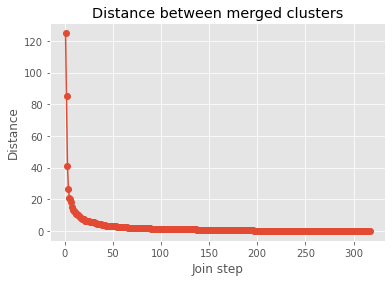

In [39]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Join step')
plt.ylabel('Distance')

# Clusterization of dataset by countries

In [50]:
dataset2 = database2.drop({"Industry", 'Legal form', 'Type of ownership'}, axis=1)

In [51]:
dataset2.set_index('Country')

,Tone,Age of the company,Company size
Country,,,
United States,2,10.5,3
France,0,17.5,3
Japan,0,29.0,3
France,2,12.5,3
United States,0,17.5,2
...,...,...,...
Germany,1,25.0,3
Germany,0,15.5,2
United States,2,24.5,3


In [54]:
#  кластерный анализ

link = sch.linkage(dataset2, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = sch.dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=dataset2.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                color_threshold=-1,
                # повернуть подписи вертикально
                orientation = "right",
                leaf_rotation=0.)


ValueError: could not convert string to float: 'United States'

In [52]:
# Исключаем информацию об странах, сохраняем для дальнейшего использования
#varieties = list(dataset2.pop('Сountry'))

# Извлекаем измерения как массив NumPy
samples = dataset2.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = sch.linkage(samples, 'ward', 'euclidean')

fig = plt.figure(figsize=(15, 15))
                         
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Similarity of countries')

ax1.set_title('Dendrogram')


# Строим дендрограмму, указав параметры удобные для отображения
dn = sch.dendrogram(mergings,
           labels=dataset2.index.tolist(),
           color_threshold = 40,
           leaf_rotation=0,
           leaf_font_size=10,
           truncate_mode='lastp',
           orientation = "right",
           )

plt.show()

ValueError: could not convert string to float: 'United States'